In [1]:
# imports
import altair as alt
import pandas as pd
import sys
import os
# altair specific
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')
# adds parent directory to this notebook, so it could use relative import
sys.path.append(os.path.dirname(os.getcwd()))

# user defined modules
from src.helpers import get_data


In [2]:
# read data here
data_path = "../data/player_raw_data.csv"
# this is raw data
fifa = get_data(data_path)
# this is processed for Task 5 specific
fifa_processed = get_data(data_path, preprocess=True)

Improvements Task 1:
- Consider selection filter by Region (preffered this one)/Country(or country per each of the repeated single chart)
- The sorting of median requires manually pre-ordered levels (as a list of strings) of the attribute to be sorted. (Refer to assignment 5)
- Not necessary all countries have to appear, if they have too little counts/records, then could be omitted (or blank away by setting opacity to 0)
- Could only just show top 10/5 countries of the region as well

**NOTE**: The bullets are incorporated altogether and meant to work at the same time?

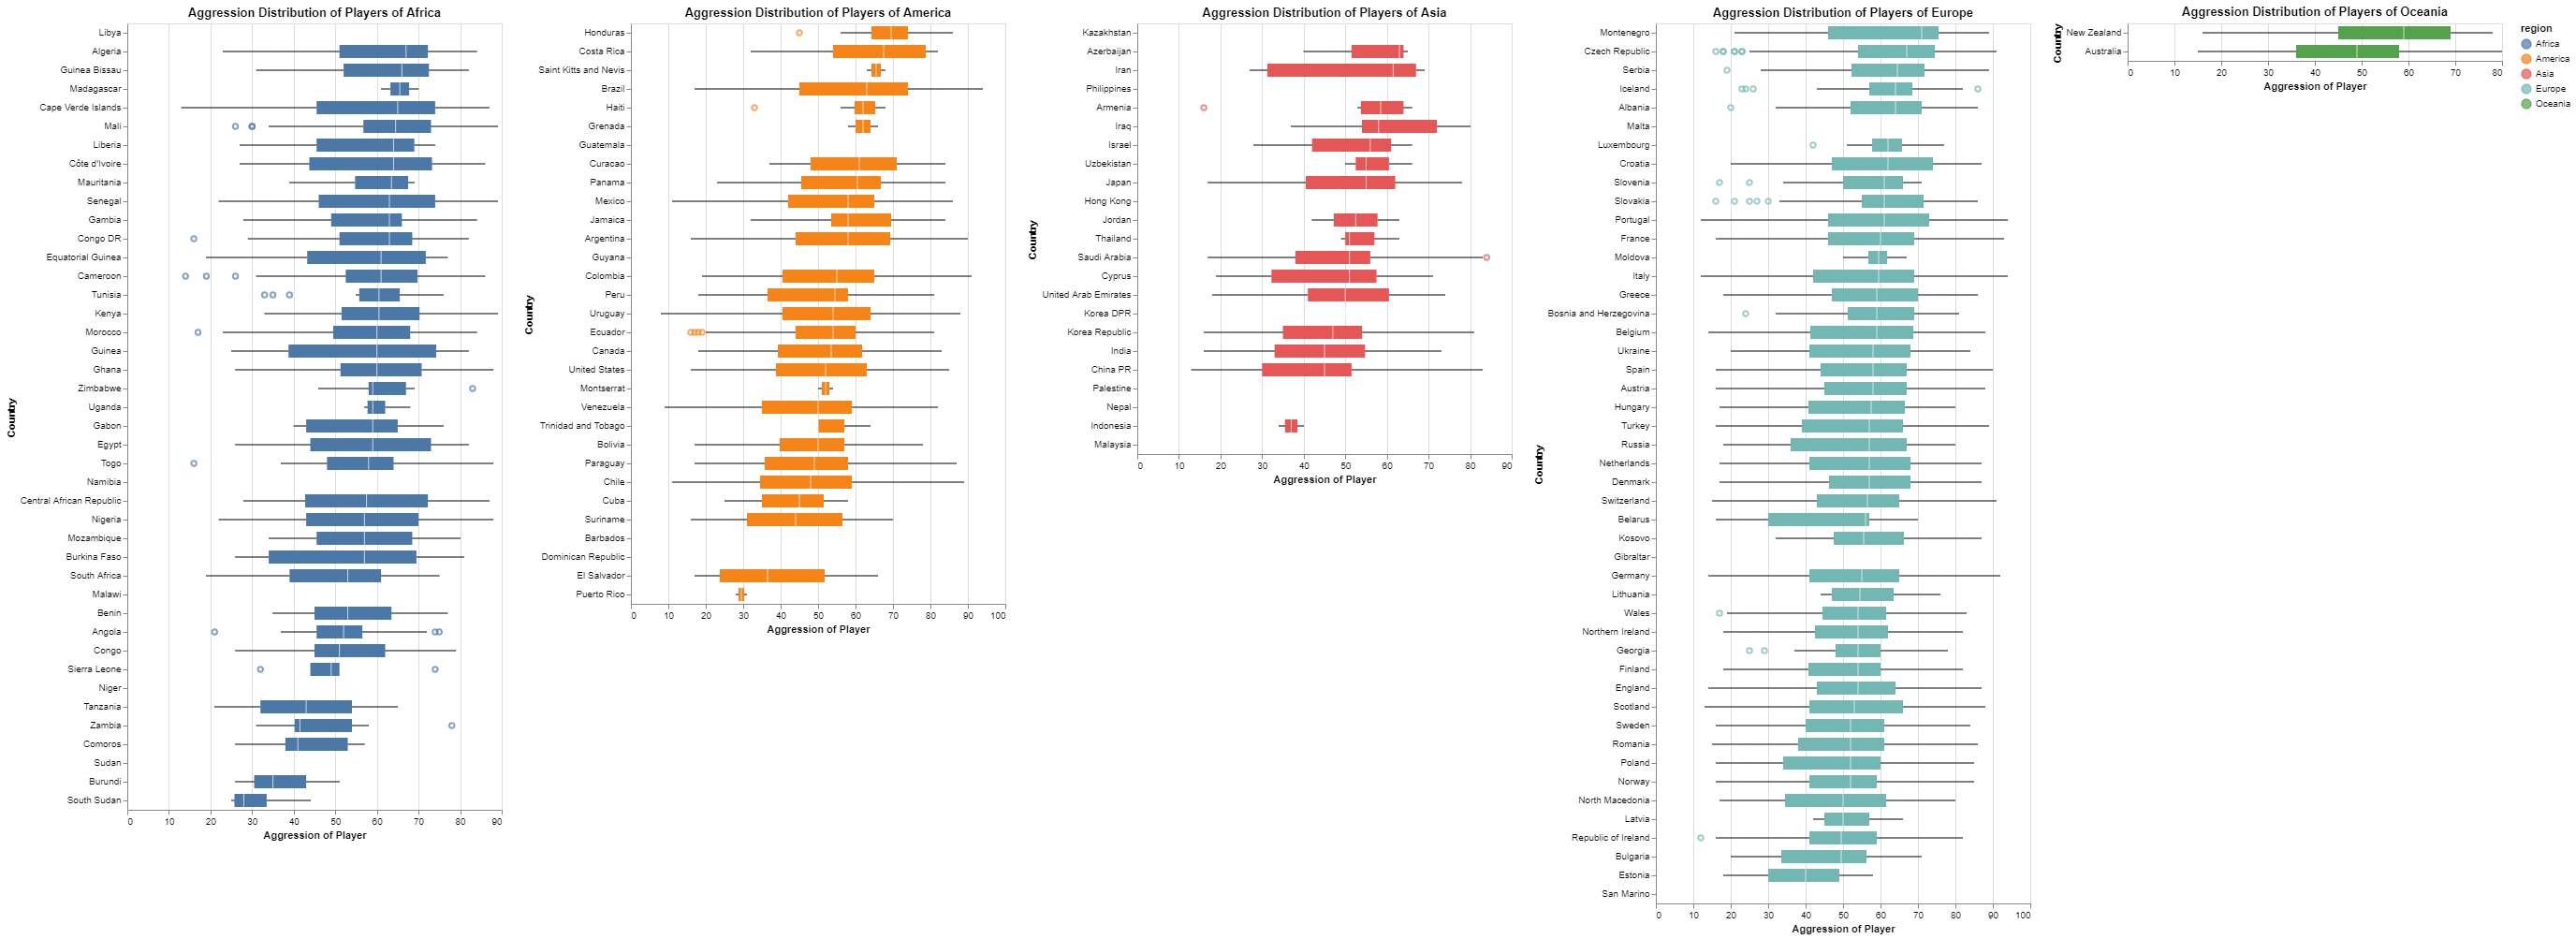

In [5]:
# get list of countries ordered by median aggression value
def task_one_viz(fifa_subset):
    country_median = fifa_subset.groupby(['country'], as_index=False).agg({'country':'first', 'region':'first', "aggression":'median'})
    top_10_per_region_df = country_median.groupby(['region','country'])["aggression"].nlargest(100).reset_index().drop(columns='level_2') 
    ordered_top_10 = top_10_per_region_df.sort_values(['region','aggression','country'],ascending=False).groupby('aggression')['country'].head(10).to_list()

    # create base plot
    aggr_base = alt.Chart(fifa_subset).mark_boxplot().encode(
            x = alt.X("aggression:Q", title="Aggression of Player"),
            y = alt.Y("country:N", title="Country", sort=ordered_top_10),
            color = alt.Color("region"))

    #aggr_base
    # create chart basis to add aggr_base by horizontal concatenation
    aggr_chart = alt.hconcat()
    regions = sorted(fifa_subset.region.unique().tolist())

    # honcat each of the base from different region filtered
    for region in regions:
        aggr_chart |= aggr_base.transform_filter(
            alt.FieldEqualPredicate(field='region', equal = region)
        ).properties(
            title=f"Aggression Distribution of Players of {region}"
        )
    return aggr_chart

t1_plot = task_one_viz(fifa_processed)
t1_plot

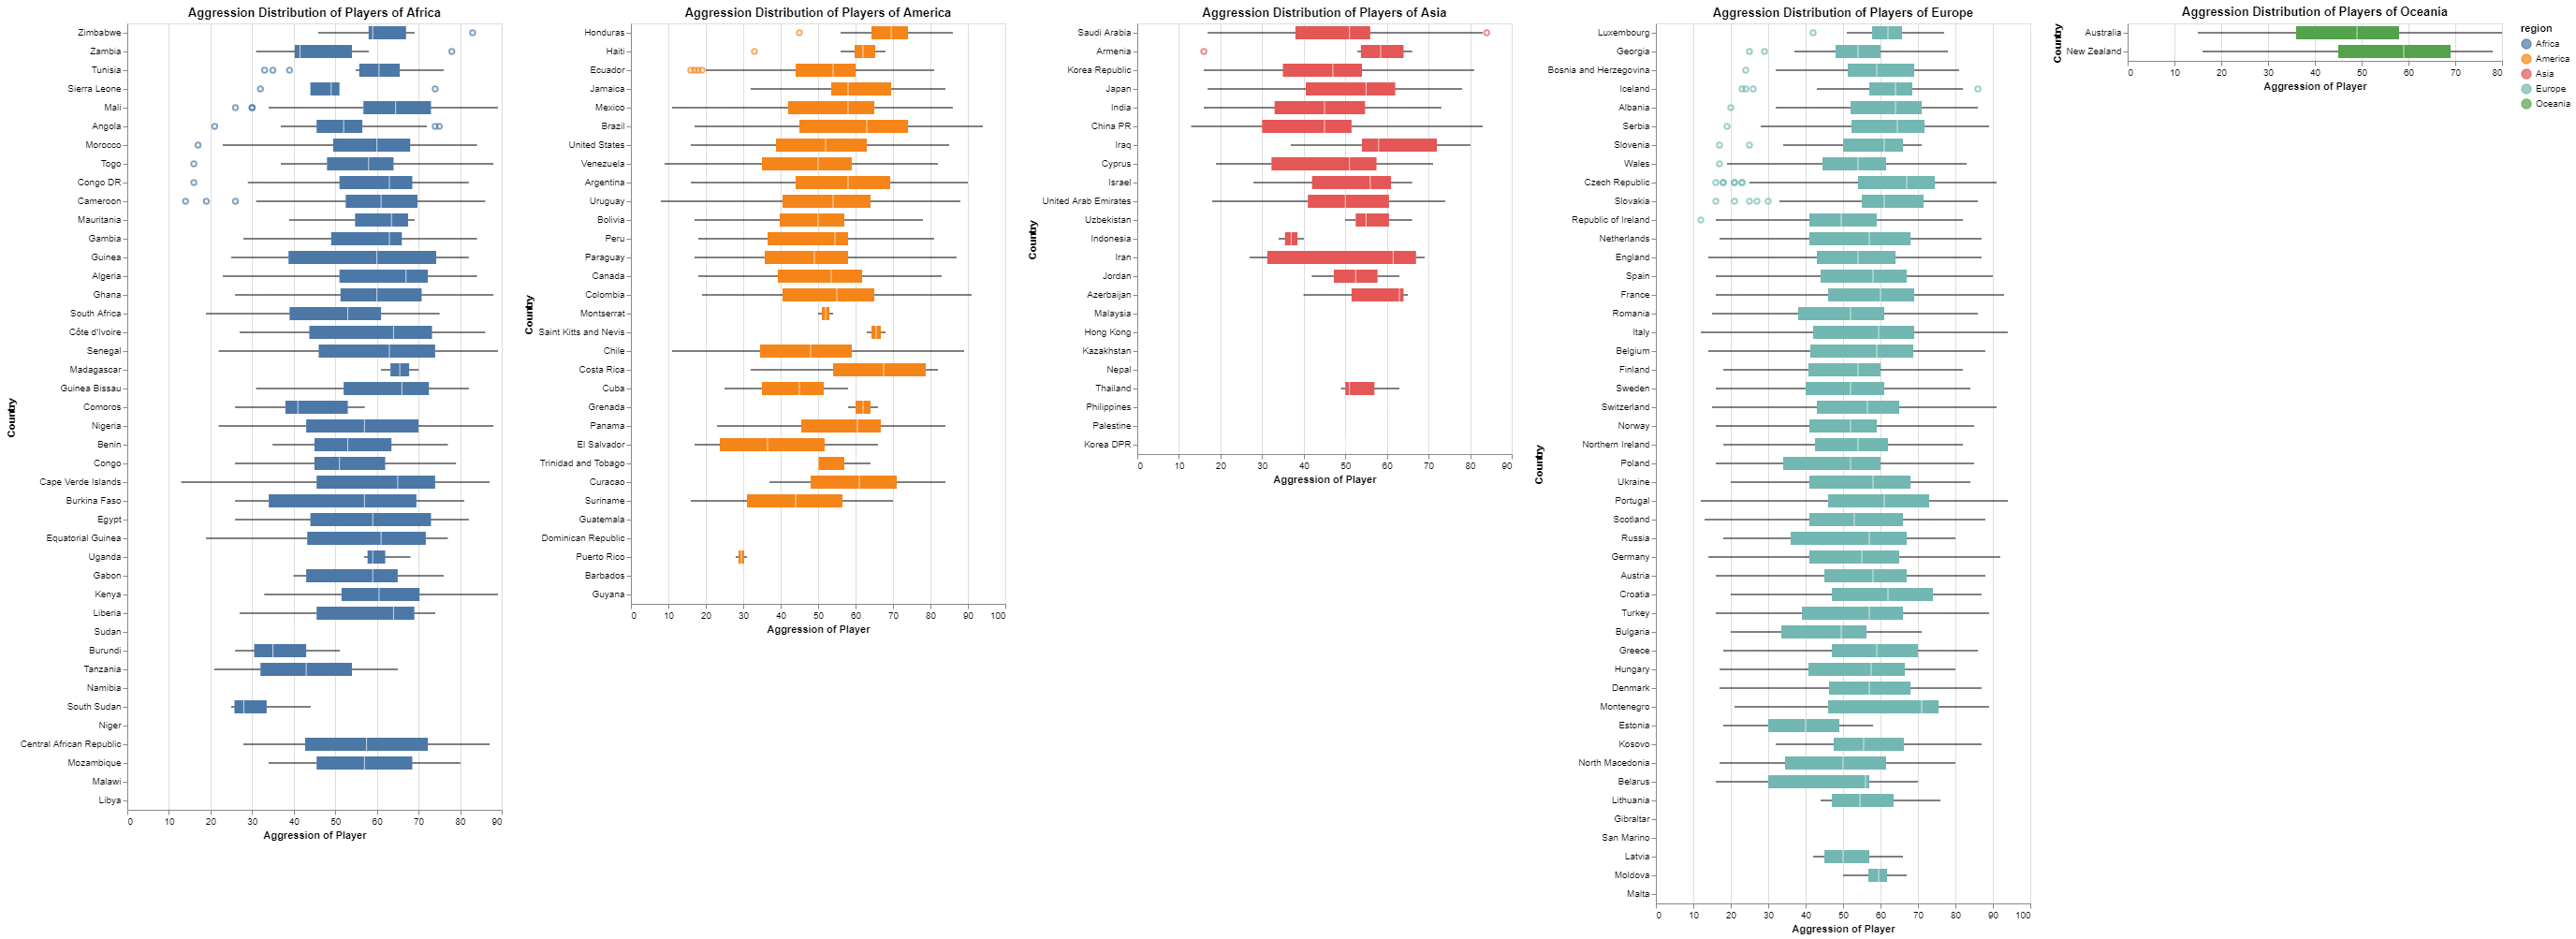

In [4]:
# 1. Find country where players are most aggressive
# Take top 5 countries, sorted by median (desc) (NOTE: NOT sorting properly now)

# create base plot
aggr_base = alt.Chart(fifa_processed).mark_boxplot().encode(
        x = alt.X("aggression", title="Aggression of Player"),
        y = alt.Y("country:N", title="Country", sort=alt.EncodingSortField(field="aggression", order="descending")),
        color = alt.Color("region")
)
# create chart basis to add aggr_base by horizontal concatenation
aggr_chart = alt.hconcat()
regions = sorted(fifa_processed.region.unique().tolist())
# honcat each of the base from different region filtered
for region in regions:
    aggr_chart |= aggr_base.transform_filter(
        alt.FieldEqualPredicate(field='region', equal = region)
    ).properties(
        title=f"Aggression Distribution of Players of {region}"
    )
aggr_chart